In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./datasets/smartphones_cleaned_v4.csv')

In [3]:
df

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,snapdragon,8.0,3.00,...,120,3,1.0,android,64.0,16.0,0,NaN,1080,2460
976,honor,Honor X8 5G,14990,75.0,True,False,False,snapdragon,8.0,2.20,...,60,3,1.0,android,48.0,8.0,1,1024.0,720,1600
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8.0,2.85,...,144,3,1.0,android,64.0,16.0,0,NaN,1080,2460
978,motorola,Motorola Moto G91 5G,19990,80.0,True,True,False,snapdragon,8.0,2.20,...,60,3,1.0,android,108.0,32.0,1,1024.0,1080,2400


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

# Steps of EDA
1. Reason of doing EDA?
2. Classify columns into numerical and categorical
3. Univarite analysis
4. Bivariate analysis
5. Multivariate analysis
6. Feature engineering
7. Filling missing values
8. Analyse outliers to decide whether to keep or remove them
8. Formatting data in correct form for predictive model

# Univariate analysis

In [15]:
df['brand_name'].value_counts()

brand_name
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: count, dtype: int64

<Axes: xlabel='brand_name'>

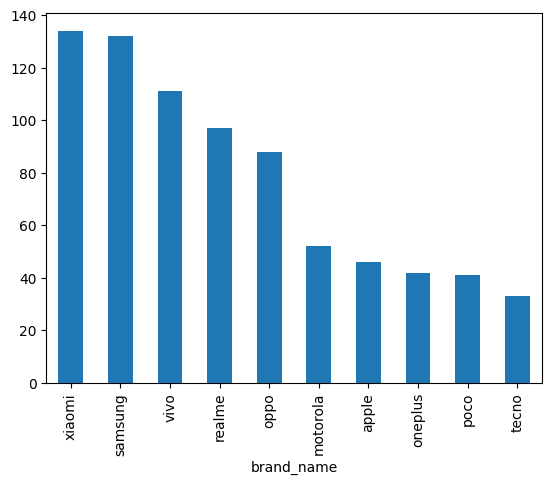

In [21]:
df['brand_name'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='count'>

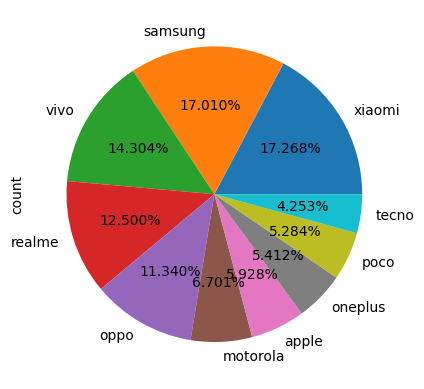

In [26]:
df['brand_name'].value_counts().head(10).plot(kind='pie',autopct='%0.3f%%')

In [27]:
df['brand_name'].isnull().sum()

0

In [29]:
df['model'].nunique()

980

In [31]:
df['price'].describe()
# distribution is not normal
# there are outliers because there is difference in mean and median

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

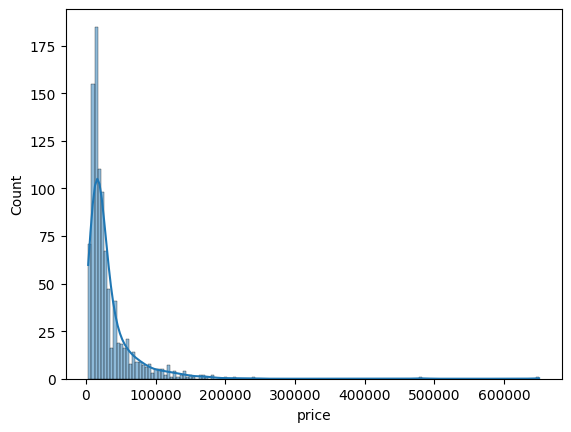

In [33]:
sns.histplot(data=df,x='price',kde=True)
# most of the phones have low price and less number of phones have high price

In [34]:
df['price'].skew()
# price column is highly positively skewed

6.591790999665567

<Axes: xlabel='price'>

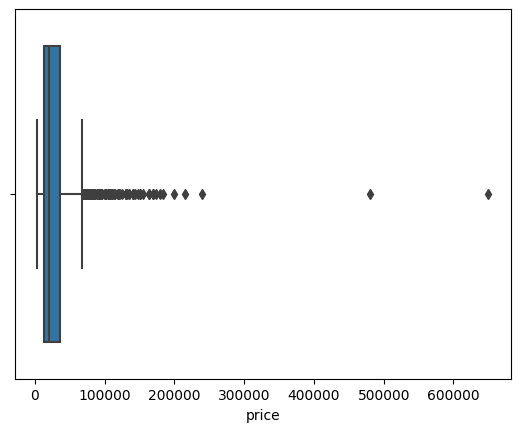

In [35]:
sns.boxplot(data=df,x='price')
# too many outliers

In [39]:
df[df['price']>200000]
# should we keep these phones or remove them from our data for predictive columns?
# we will be removing them because price of these phone does not depend on other columns such as ram,battery,processor

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,8.0,1.50,2275.0,0,NaN,2.0,64.0,4.70,60,1,1.0,android,13.0,2.1,0,NaN,1080,1920
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,snapdragon,8.0,3.20,4700.0,1,66.0,12.0,512.0,6.74,120,3,1.0,other,50.0,13.0,1,256.0,1212,2616
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,snapdragon,8.0,2.80,4000.0,1,27.0,8.0,256.0,6.39,60,3,1.0,android,48.0,20.0,0,NaN,1080,2340
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,kirin,8.0,2.86,4500.0,1,NaN,12.0,512.0,6.53,60,4,2.0,android,40.0,32.0,1,256.0,1176,2400


In [41]:
df['price'].isnull().sum()

0

In [43]:
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

<Axes: xlabel='rating', ylabel='Count'>

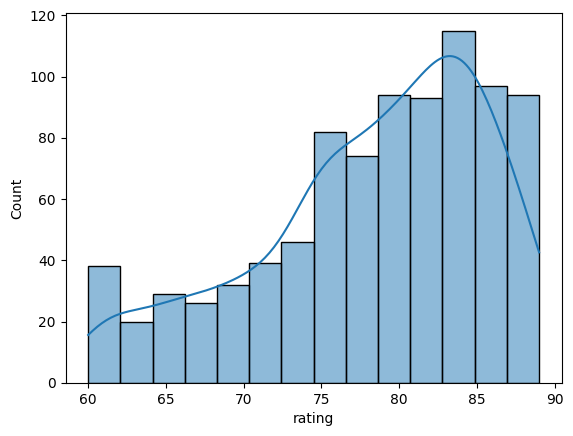

In [46]:
sns.histplot(data=df,x='rating',kde=True)

In [47]:
df['rating'].skew()

-0.6989993034105535

<Axes: xlabel='rating'>

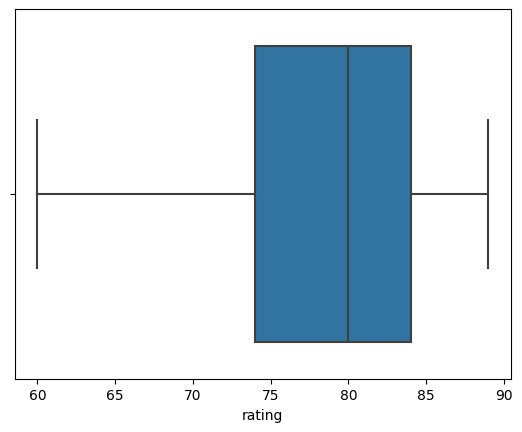

In [50]:
sns.boxplot(data=df,x='rating')
# no outliers and distribution is slightly left skewed

In [55]:
print(df['rating'].isnull().sum())
print(f"{((df['rating'].isnull().sum())/df.shape[0])*100}% missing values")
# too many missing values

101
10.306122448979592% missing values


<Axes: ylabel='count'>

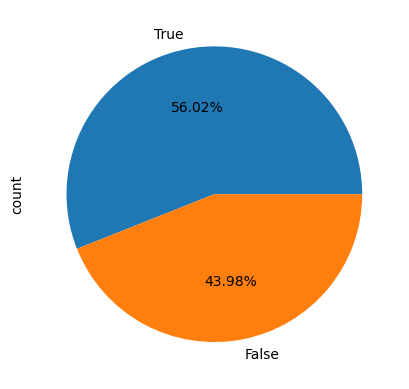

In [61]:
df['has_5g'].value_counts().plot(kind='pie',autopct='%0.2f%%')
# can be used to predict price

<Axes: ylabel='count'>

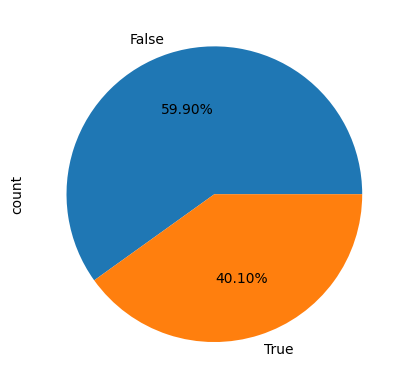

In [62]:
df['has_nfc'].value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

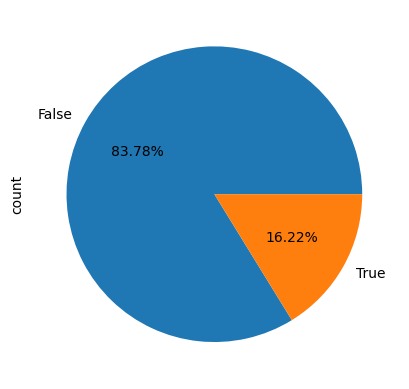

In [64]:
df['has_ir_blaster'].value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: xlabel='brand_name'>

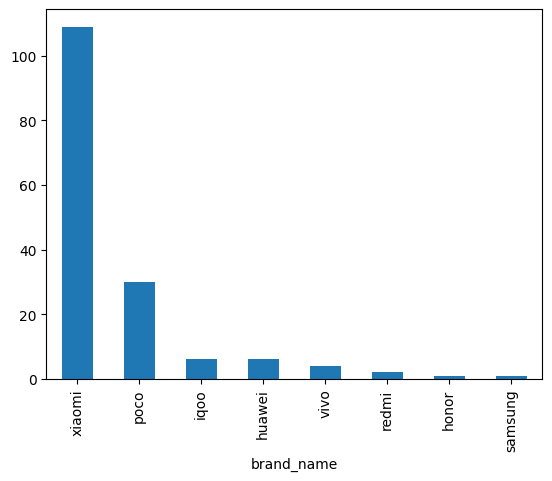

In [70]:
df[df['has_ir_blaster']==True]['brand_name'].value_counts().plot(kind='bar')
# mostly chinese phones have IR blaster

In [77]:
df['processor_brand'].value_counts()

processor_brand
snapdragon    413
helio         201
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
google          9
kirin           7
spreadtrum      4
sc9863a         2
fusion          1
mediatek        1
Name: count, dtype: int64

<Axes: ylabel='count'>

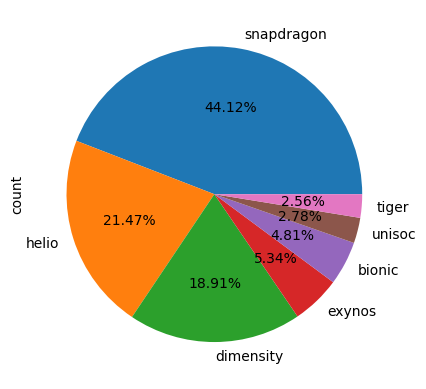

In [76]:
df['processor_brand'].value_counts().head(7).plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

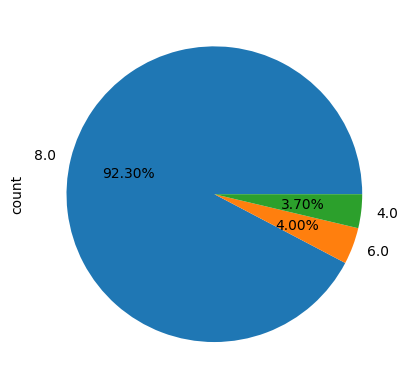

In [79]:
df['num_cores'].value_counts().plot(kind='pie',autopct='%0.2f%%')
# it will not contribute in prediction because 90% values are same

<Axes: ylabel='count'>

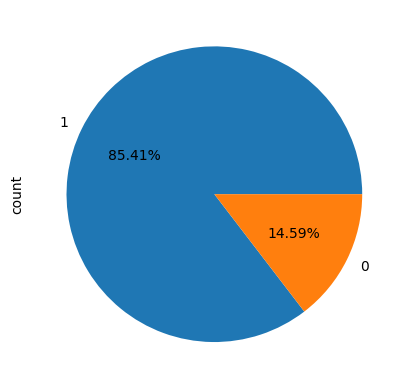

In [82]:
df['fast_charging_available'].value_counts().head(7).plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

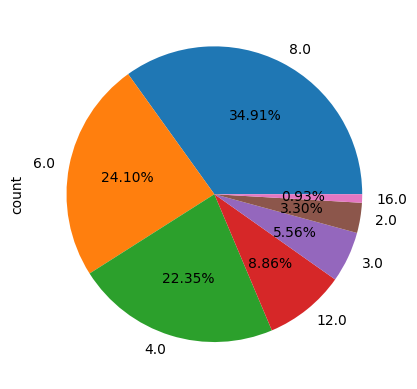

In [83]:
df['ram_capacity'].value_counts().head(7).plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

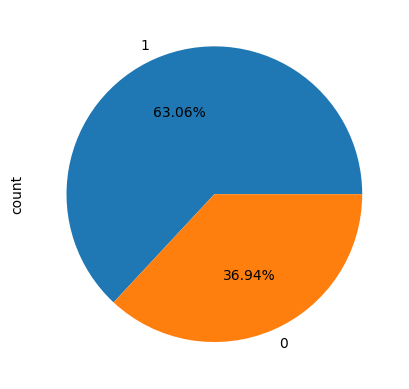

In [84]:
df['extended_memory_available'].value_counts().head(7).plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

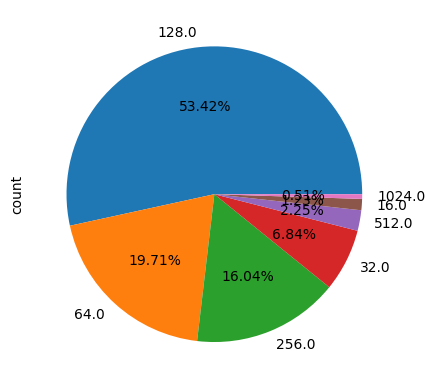

In [85]:
df['internal_memory'].value_counts().head(7).plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

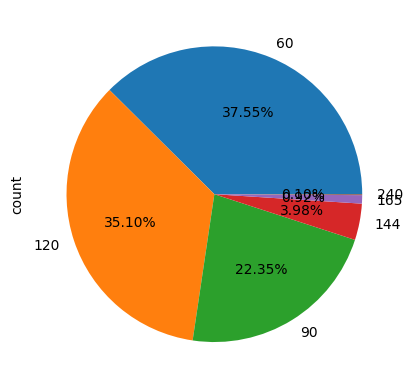

In [86]:
df['refresh_rate'].value_counts().head(7).plot(kind='pie',autopct='%0.2f%%')

In [87]:
df['refresh_rate'].value_counts()

refresh_rate
60     368
120    344
90     219
144     39
165      9
240      1
Name: count, dtype: int64

<Axes: ylabel='count'>

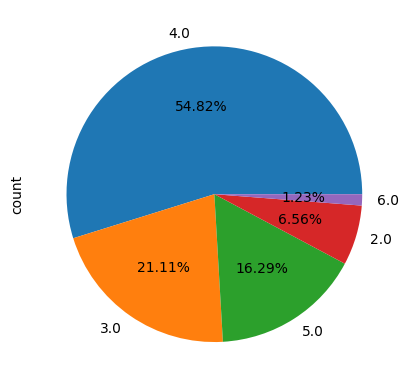

In [91]:
(df['num_rear_cameras']+df['num_front_cameras']).value_counts().head(7).plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

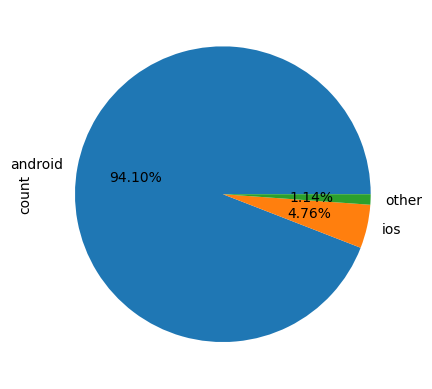

In [93]:
df['os'].value_counts().head(7).plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

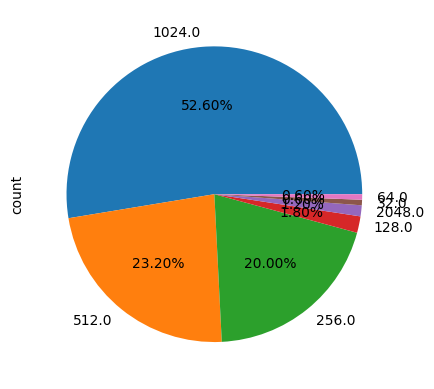

In [95]:
df['extended_upto'].value_counts().head(7).plot(kind='pie',autopct='%0.2f%%')

In [102]:
def plot_numerical(col):
    sns.displot(kind='hist',data=df,x=col,kde=True,label=col)
    sns.catplot(kind='box',data=df,x=col)

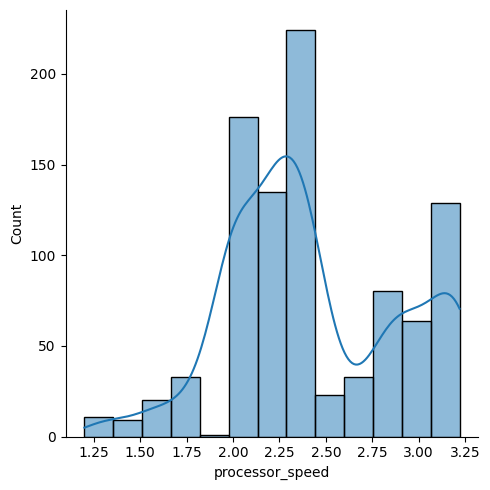

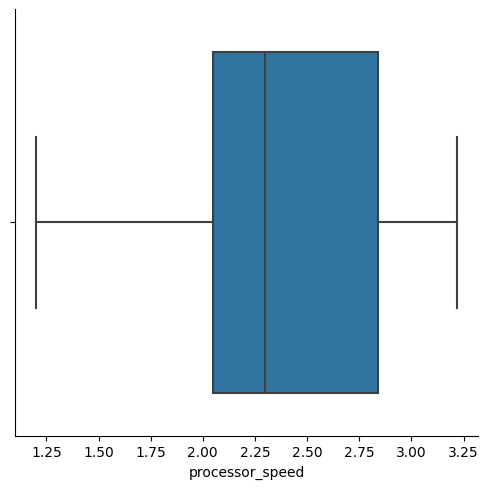

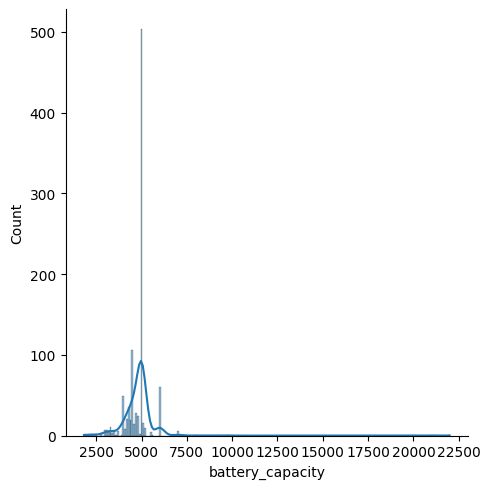

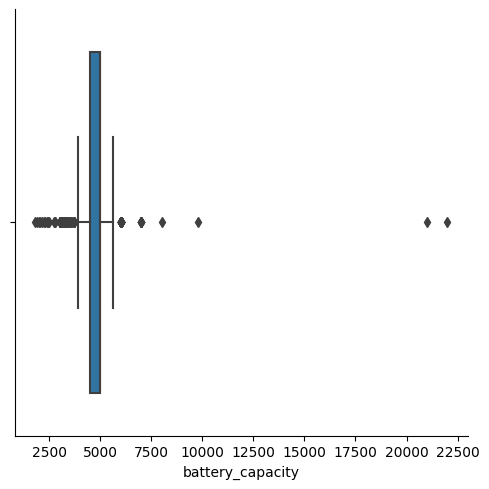

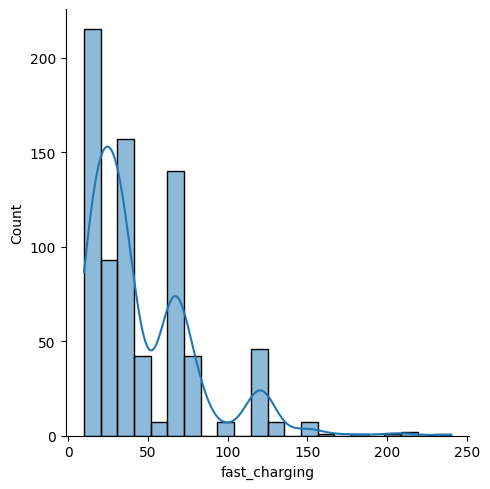

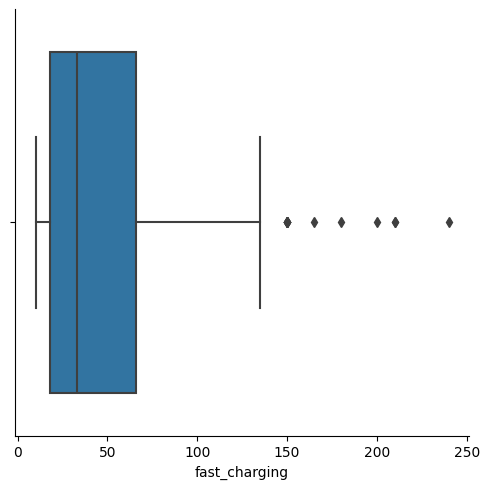

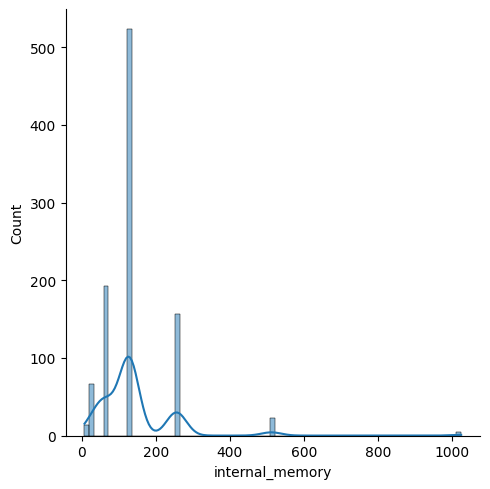

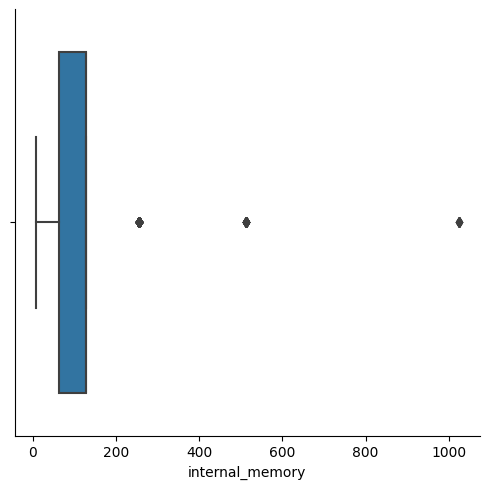

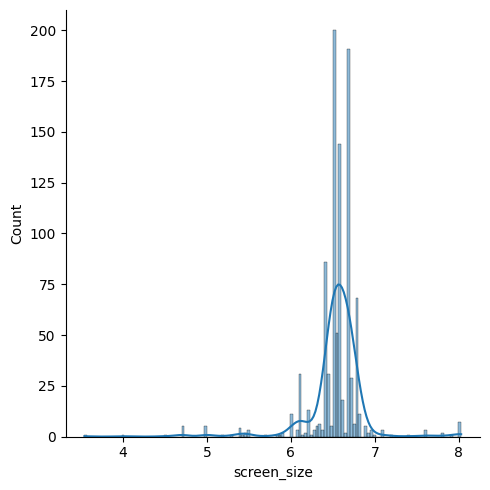

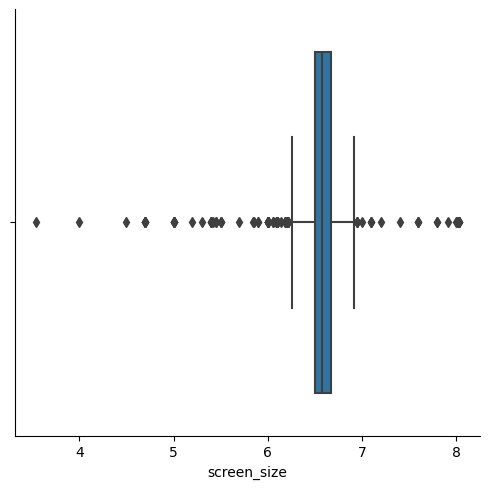

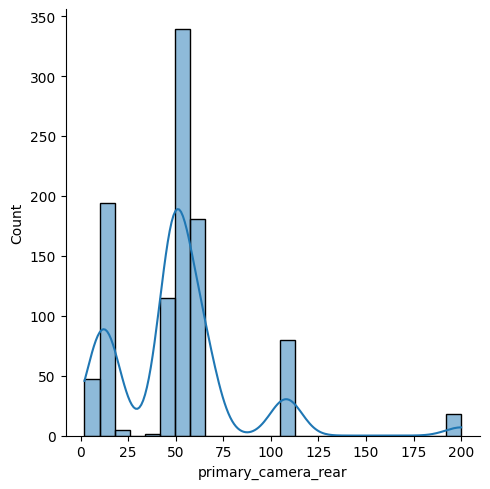

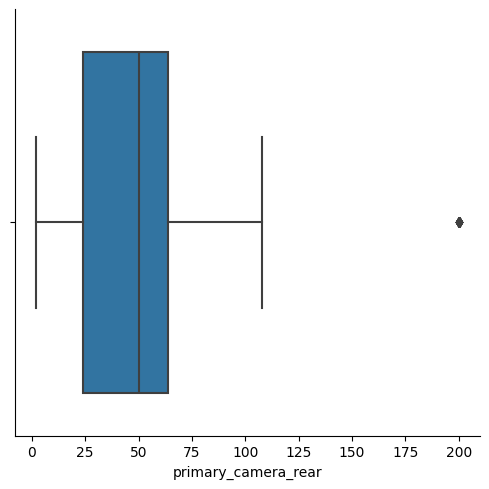

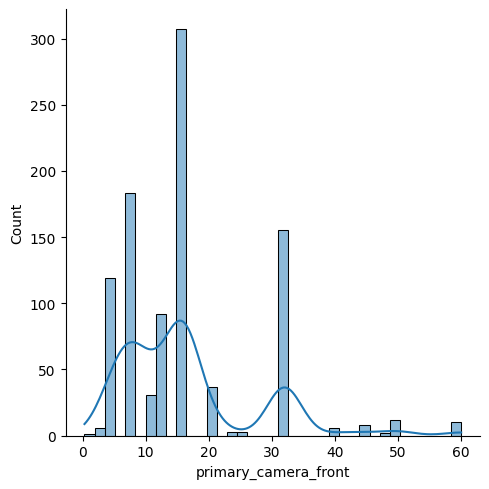

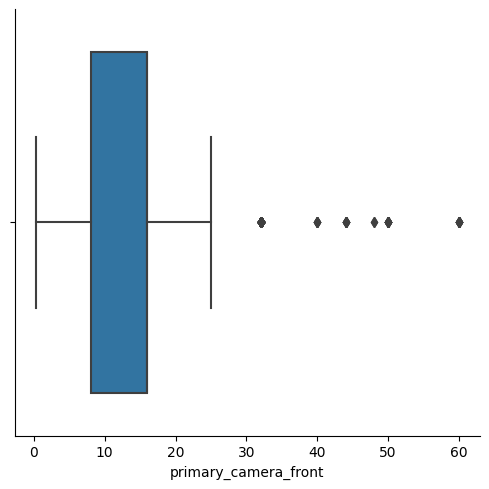

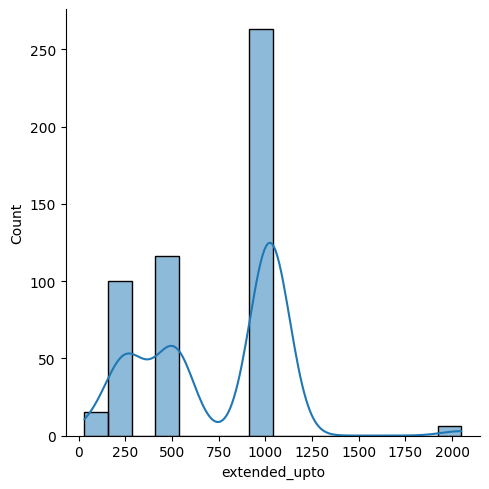

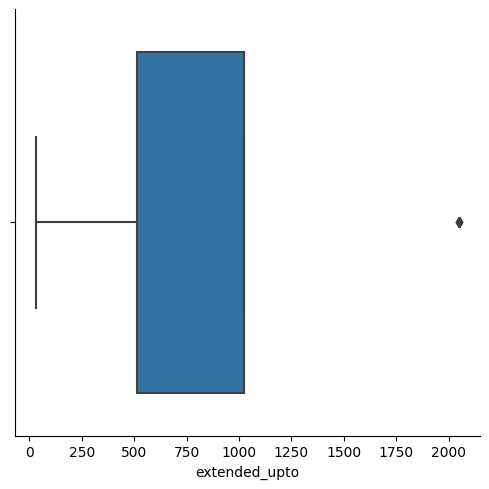

In [106]:
for i in df.select_dtypes(include=['int64','float64']).iloc[:,[3,4,6,8,9,13,14,16]].columns:
    plot_numerical(i)


# Bivariate analysis

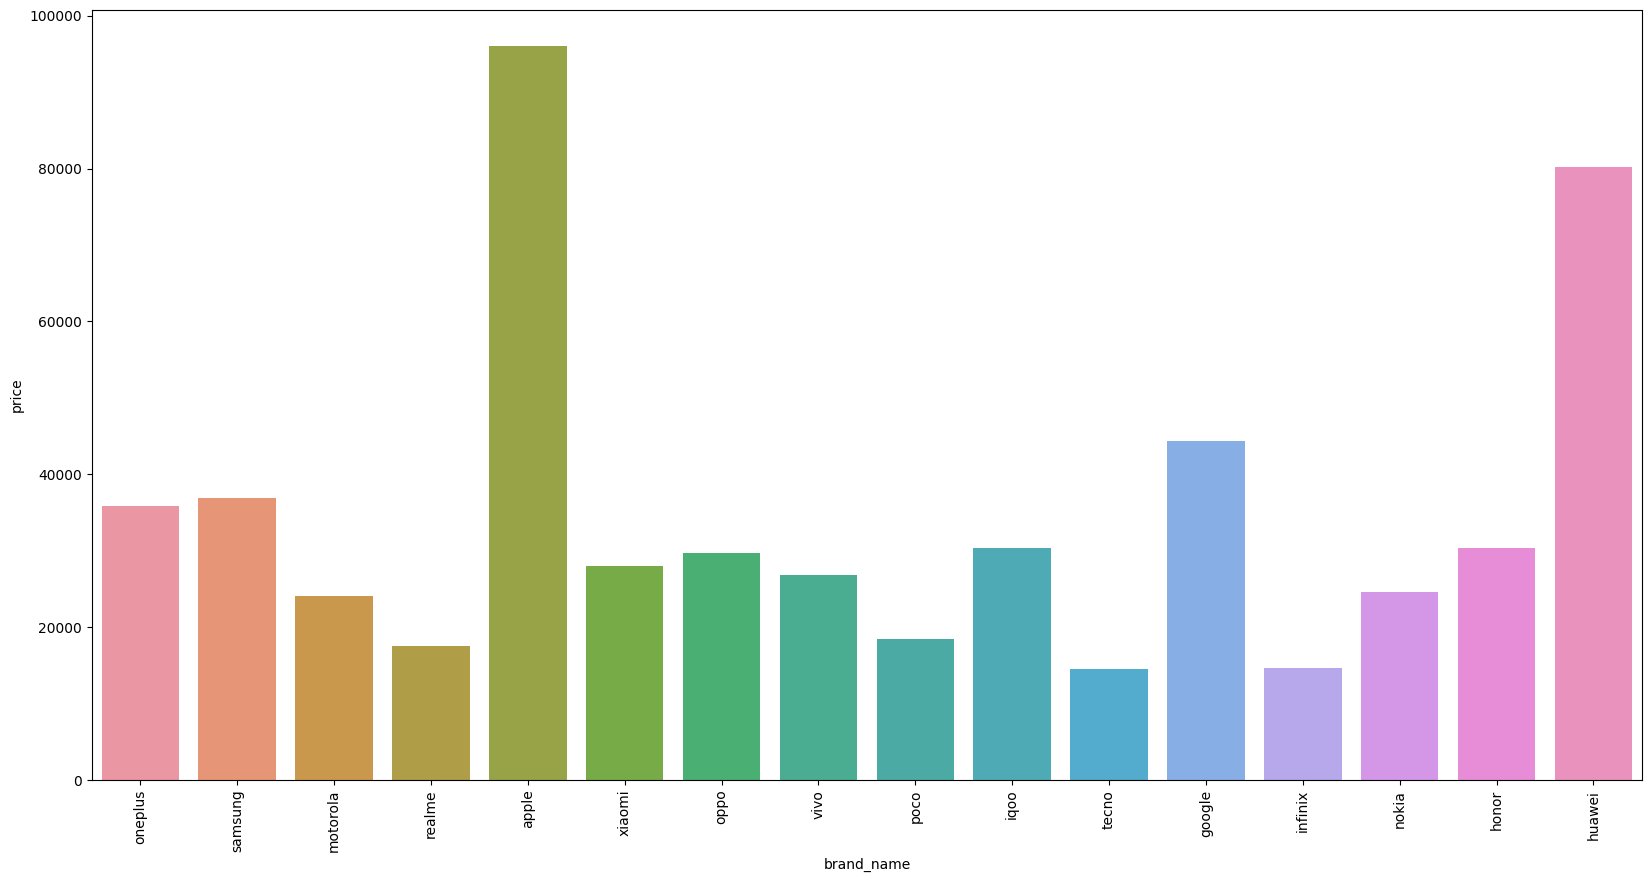

In [124]:
x=df['brand_name'].value_counts()
i=x[x>10].index
plt.figure(figsize=(20,10))
sns.barplot(data=df[df['brand_name'].isin(i)],x='brand_name',y='price',estimator='mean',errorbar=None)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='rating', ylabel='price'>

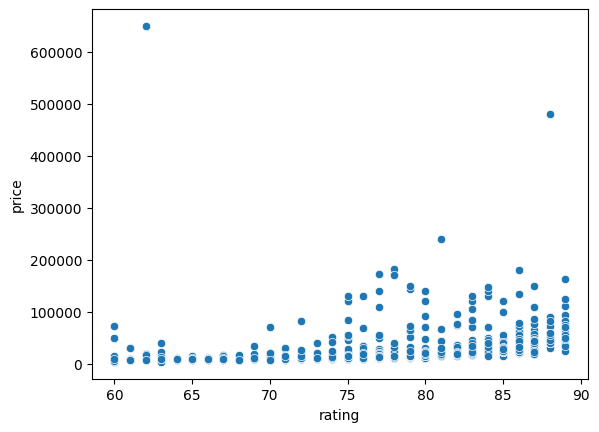

In [129]:
sns.scatterplot(data=df,x='rating',y='price')

In [130]:
df[['rating','price']].corr()
# not so strong correlation

,rating,price
rating,1.000000,0.283504
price,0.283504,1.000000


<Axes: xlabel='has_5g', ylabel='price'>

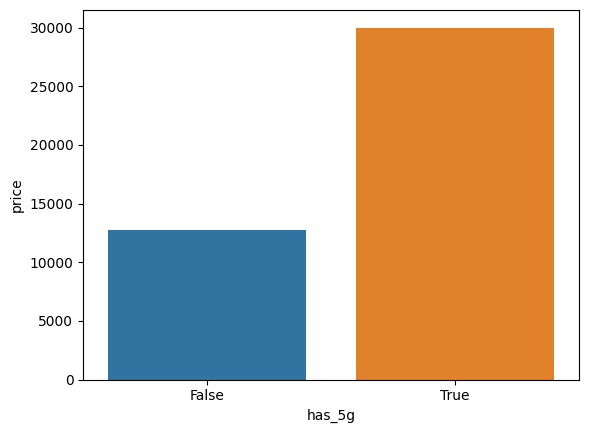

In [135]:
sns.barplot(data=df,x='has_5g',y='price',estimator='median',errorbar=None)
# 5G phones have higher price

<Axes: xlabel='has_nfc', ylabel='price'>

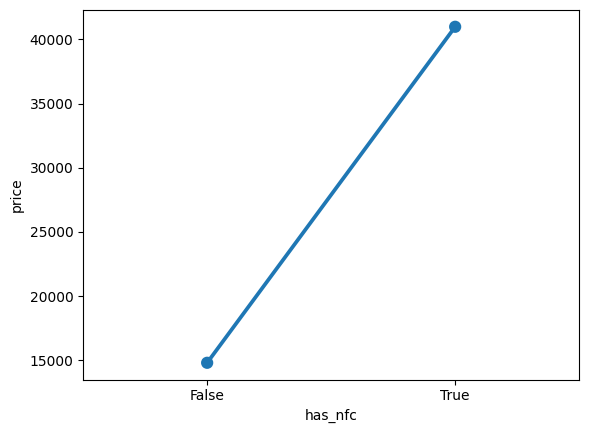

In [137]:
sns.pointplot(data=df,x='has_nfc',y='price',estimator='median',errorbar=None)
# nfc phones have higher price

<Axes: xlabel='has_ir_blaster', ylabel='price'>

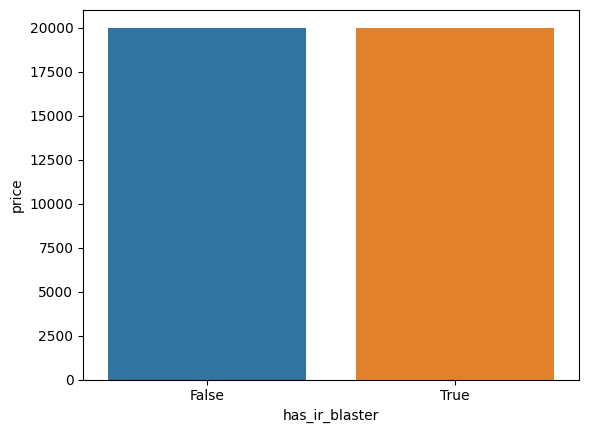

In [142]:
sns.barplot(data=df,x='has_ir_blaster',y='price',estimator='median',errorbar=None)
# no difference in price on IR blaster

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'snapdragon'),
  Text(1, 0, 'exynos'),
  Text(2, 0, 'dimensity'),
  Text(3, 0, 'bionic'),
  Text(4, 0, 'helio'),
  Text(5, 0, 'unisoc'),
  Text(6, 0, 'tiger'),
  Text(7, 0, 'google'),
  Text(8, 0, 'sc9863a'),
  Text(9, 0, 'spreadtrum'),
  Text(10, 0, 'fusion'),
  Text(11, 0, 'kirin'),
  Text(12, 0, 'mediatek')])

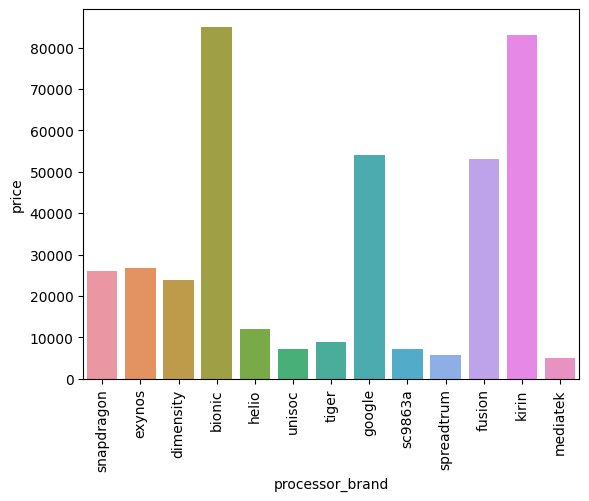

In [144]:
sns.barplot(data=df,x='processor_brand',y='price',estimator='median',errorbar=None)
plt.xticks(rotation=90)
# kirin has high price because of some flagship phones of huawei and less number of phones(7 phones only)
# iphones having bionic chip have higher price
# google tensor processor phone has high price
# processors that are not so common have lower price than others

<Axes: xlabel='num_cores', ylabel='price'>

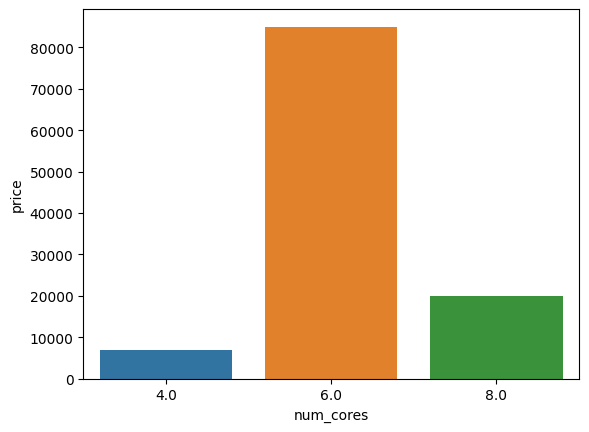

In [148]:
sns.barplot(data=df,x='num_cores',y='price',estimator='median',errorbar=None)

In [152]:
pd.crosstab(df['num_cores'],df['os'],normalize='columns')*10
# most hexa cores phones are iphones thats why its price is higher

os,android,ios,other
num_cores,,,
4.0,3.634361,2.439024,9.090909
6.0,0.000000,95.121951,0.000000
8.0,96.365639,2.439024,90.909091


<Axes: xlabel='screen_size', ylabel='price'>

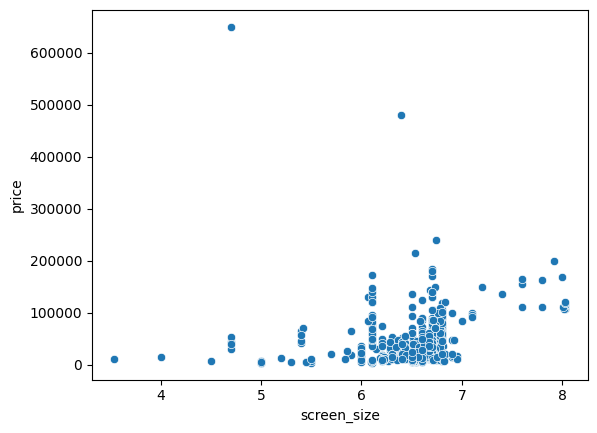

In [156]:
sns.scatterplot(data=df,x='screen_size',y='price')

In [158]:
df[['screen_size','price']].corr()
# no correlation with screen_size

,screen_size,price
screen_size,1.000000,0.113253
price,0.113253,1.000000


<Axes: >

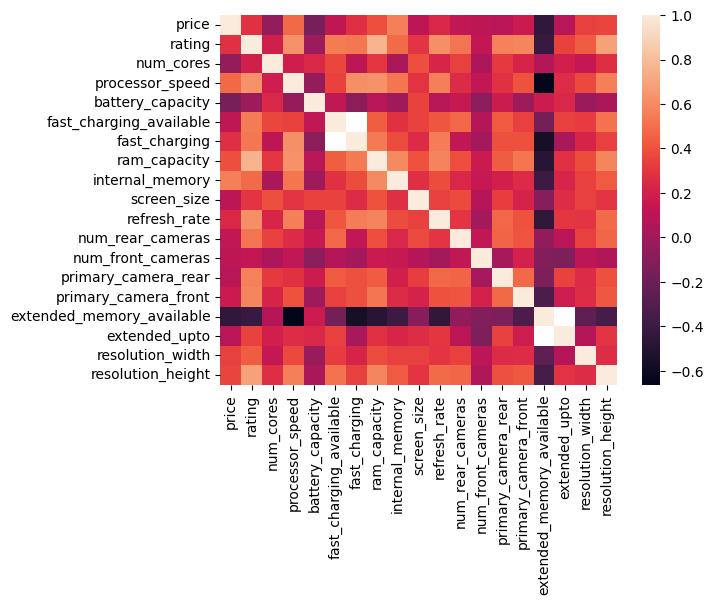

In [164]:
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr())

In [169]:
df.select_dtypes(include=['int64','float64']).corr()['price']

price                        1.000000
rating                       0.283504
num_cores                   -0.048561
processor_speed              0.474049
battery_capacity            -0.159232
fast_charging_available      0.116739
fast_charging                0.277591
ram_capacity                 0.386002
internal_memory              0.557168
screen_size                  0.113253
refresh_rate                 0.244115
num_rear_cameras             0.125330
num_front_cameras            0.115228
primary_camera_rear          0.092095
primary_camera_front         0.162995
extended_memory_available   -0.448628
extended_upto                0.091945
resolution_width             0.340592
resolution_height            0.353578
Name: price, dtype: float64

# Missing values

In [170]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [172]:
df.select_dtypes(include=['int64','float64']).corr()['rating']
# ratings has high correlation on others so other columns can help in predicting rating value to fill missing values

price                        0.283504
rating                       1.000000
num_cores                    0.199741
processor_speed              0.628446
battery_capacity            -0.015581
fast_charging_available      0.542814
fast_charging                0.527613
ram_capacity                 0.757613
internal_memory              0.481070
screen_size                  0.298272
refresh_rate                 0.610795
num_rear_cameras             0.515531
num_front_cameras            0.131480
primary_camera_rear          0.562046
primary_camera_front         0.577861
extended_memory_available   -0.415265
extended_upto                0.346761
resolution_width             0.432582
resolution_height            0.688108
Name: rating, dtype: float64

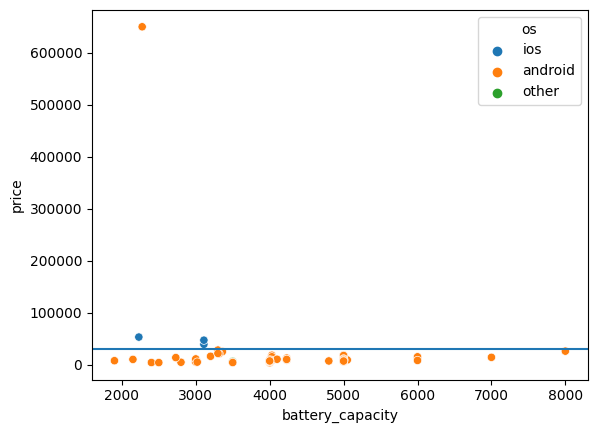

In [19]:
sns.scatterplot(data=df[df['fast_charging_available']==0],x='battery_capacity',y='price',hue='os')
plt.axhline(30000)
# iphones with low battery capacity have higher price as compared to android phones with same battery capacity

<Axes: xlabel='count', ylabel='fast_charging_available'>

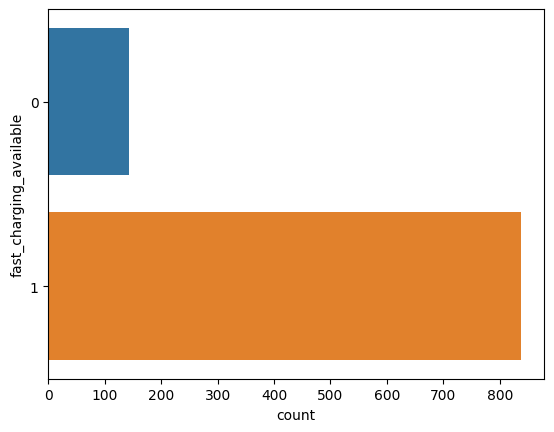

In [38]:
sns.countplot(data=df,y='fast_charging_available')
# less phones with no fast charging

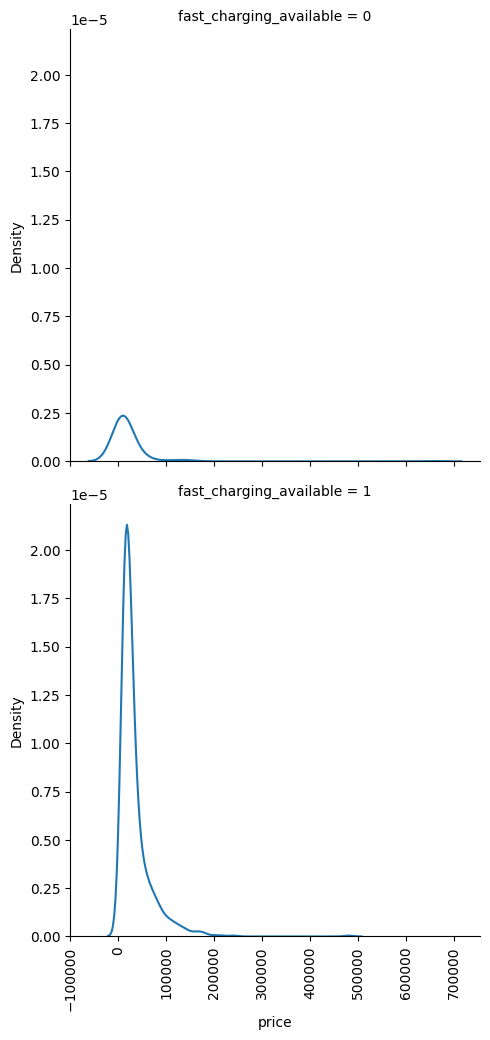

In [41]:
sns.displot(kind='kde',data=df,row='fast_charging_available',x='price')
plt.xticks(rotation=90)
plt.show()
# phones with fast charging are slightly right skewed and shifted to a bit right as compared to phones with no fast charging
# this shows that phones with fast charging have a slightly higher price becuase mean of phones with fast charging
# is influenced by outliers thats why there is not much difference in price

<Axes: xlabel='fast_charging_available', ylabel='price'>

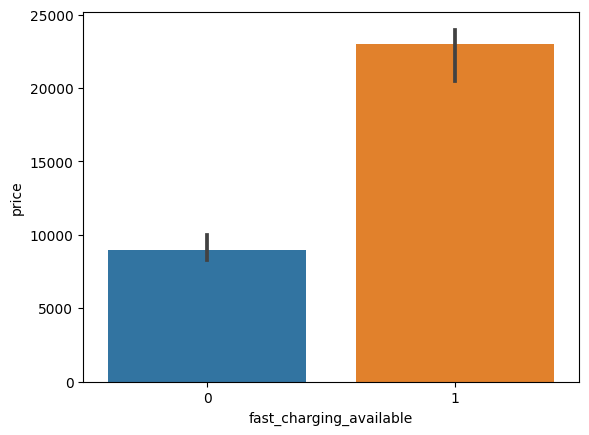

In [44]:
sns.barplot(data=df,x='fast_charging_available',y='price',estimator='median')

<Axes: xlabel='refresh_rate', ylabel='price'>

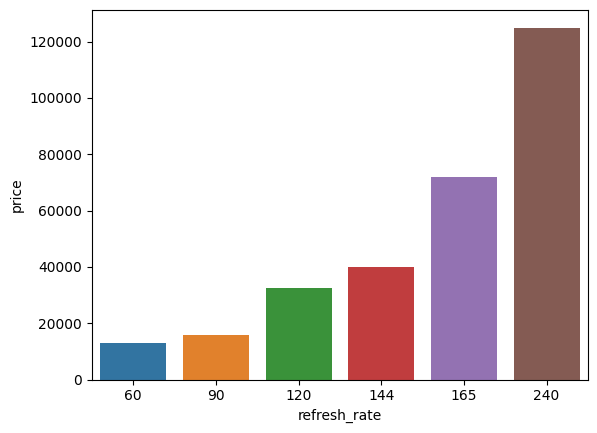

In [47]:
sns.barplot(data=df,x='refresh_rate',y='price',errorbar=None,estimator='median')
# phones with higher refresh_rate have higher price

In [56]:
df['refresh_rate'].value_counts()
# only 1 phone of 240 refresh rate so it can help in prediction even though there is only one phone

refresh_rate
60     368
120    344
90     219
144     39
165      9
240      1
Name: count, dtype: int64

In [57]:
df[df['refresh_rate']==240]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
784,leitz,Leitz Phone 2,124990,89.0,True,True,False,snapdragon,8.0,3.0,5000.0,1,NaN,12.0,256.0,6.6,240,2,1.0,android,47.2,12.6,1,1024.0,1260,2730


<Axes: xlabel='refresh_rate', ylabel='price'>

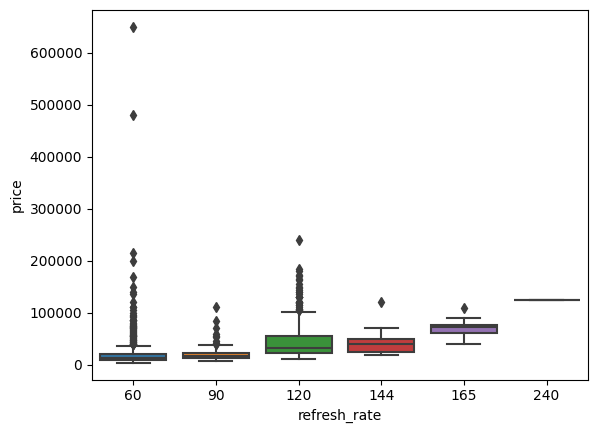

In [55]:
sns.boxplot(data=df,x='refresh_rate',y='price')
# 60,90 and 120 Hz phones are highly influenced by outliers

<Axes: xlabel='internal_memory', ylabel='price'>

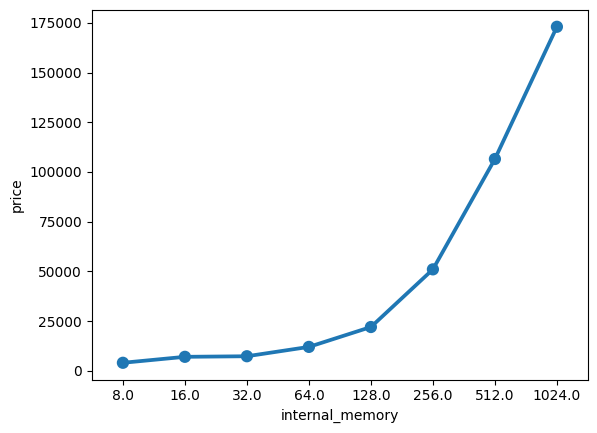

In [63]:
sns.pointplot(data=df,x='internal_memory',y='price',estimator='median',errorbar=None)
# 16 and 32 gb phones have same price else there is an increasing trend

<Axes: xlabel='internal_memory', ylabel='price'>

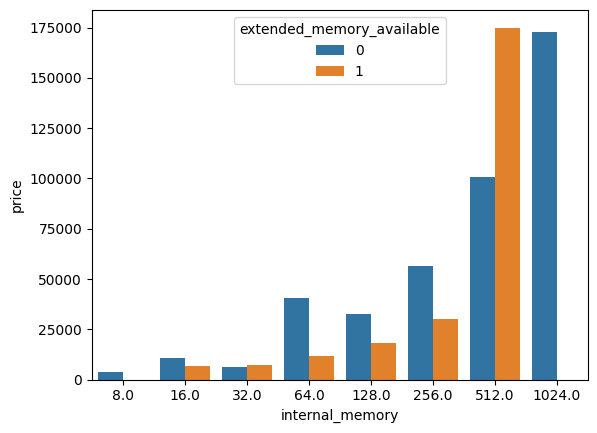

In [70]:
sns.barplot(data=df,x='internal_memory',y='price',estimator='median',errorbar=None,hue='extended_memory_available')
# same increasing trend except 512 gb,maybe because of outlier

In [91]:
df[df['brand_name'].isin(x)].pivot_table(index='brand_name',columns='num_rear_cameras',values='price',aggfunc='mean')

num_rear_cameras,1,2,3,4
brand_name,,,,
apple,43354.000000,68675.090909,141412.526316,NaN
asus,NaN,63990.000000,76496.000000,NaN
google,15994.500000,37709.750000,71747.250000,NaN
honor,9999.000000,NaN,28118.375000,39744.500000
huawei,NaN,10949.000000,92706.857143,77867.375000
infinix,NaN,11337.545455,16680.411765,16999.000000
iqoo,NaN,14744.000000,31339.066667,NaN
itel,4925.333333,6070.800000,6490.000000,NaN
motorola,10499.000000,19601.800000,25423.255814,17162.666667


<Axes: xlabel='num_rear_cameras', ylabel='brand_name'>

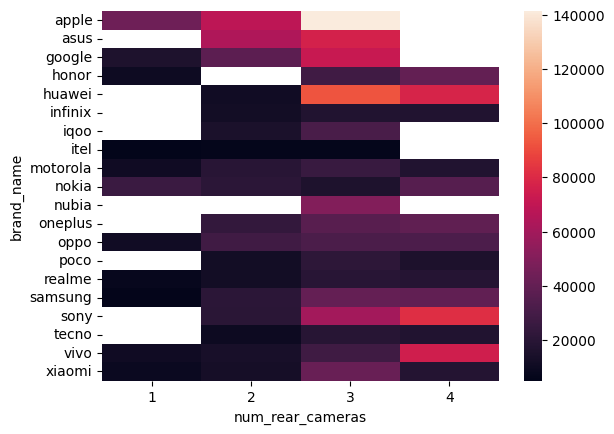

In [90]:
x=df.groupby('brand_name')['model'].count().sort_values().tail(20).index
sns.heatmap(df[df['brand_name'].isin(x)].pivot_table(index='brand_name',columns='num_rear_cameras',values='price',aggfunc='mean'))
# apple phones with 3 cameras have highest price as compared to others
# huawei,google,asus,sony,vivo have higher prices for phones with more num of cameras
# some phones like infinix,tecno,realme,xiaomi have almost same prices for diff num of cameras